In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [21]:
dataset = pd.read_csv("/content/loan_dataset.csv")

In [22]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [23]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
dadataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [24]:
dataset = dataset.dropna()

In [25]:
dataset.head()
dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3+,41


<Axes: xlabel='Married', ylabel='count'>

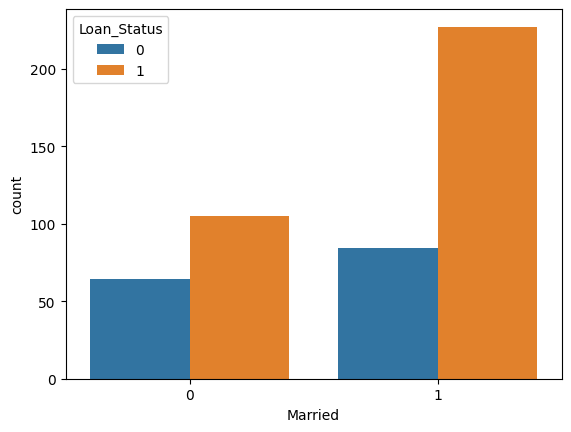

In [42]:
sns.countplot(x = 'Married', hue='Loan_Status', data = dataset)

In [26]:
dataset = dataset.replace(to_replace='3+', value=4)
dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


In [31]:
dataset.head()
dataset.replace({'Gender' : {'Male' : 1, 'Female' : 0}, 'Married' : {'Yes' : 1, 'No' : 0}, 'Education' : {'Graduate' : 1, 'Not Graduate' : 0}, 'Self_Employed' : {'No' : 0, 'Yes' : 1}, 'Property_Area' : {'Rural' : 0, 'Semiurban' : 1, 'Urban' : 2}, 'Loan_Status' : {'N' : 0, 'Y' : 1}}, inplace=True)

/tmp/ipython-input-1514814448.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'Gender' : {'Male' : 1, 'Female' : 0}, 'Married' : {'Yes' : 1, 'No' : 0}, 'Education' : {'Graduate' : 1, 'Not Graduate' : 0}, 'Self_Employed' : {'No' : 0, 'Yes' : 1}, 'Property_Area' : {'Rural' : 0, 'Semiurban' : 1, 'Urban' : 2}, 'Loan_Status' : {'N' : 0, 'Y' : 1}}, inplace=True)


<Axes: xlabel='Education', ylabel='count'>

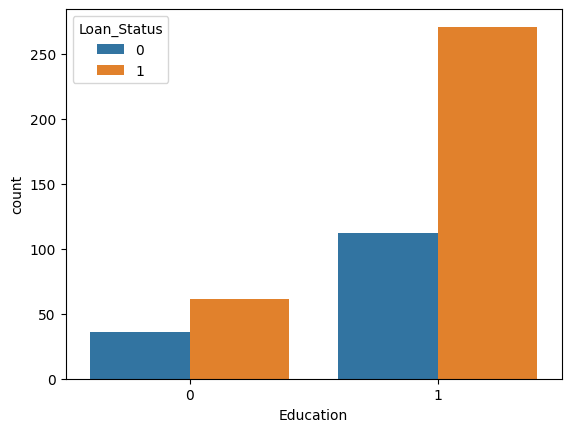

In [41]:
sns.countplot(x = 'Education', hue = 'Loan_Status', data = dataset)

In [33]:
X = dataset.drop(columns=['Loan_ID', 'Loan_Status'], axis=1)
Y = dataset['Loan_Status']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [34]:
num_features = [
    "ApplicantIncome",
    "CoapplicantIncome",
    "LoanAmount",
    "Loan_Amount_Term"
]

preprocessor = ColumnTransformer(
    transformers = [("num", StandardScaler(), num_features)], remainder = "passthrough"
)



In [37]:
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

[[-0.49938128305447255 1.0928636071647135 0.35617897968291024 ... 1 1.0 0]
 [-0.4180713114749023 0.027428972832592404 -0.5543612570958262 ... 0 0.0
  2]
 [-0.16649825940771185 -0.5775519749510866 -0.3746493682579177 ... 0 1.0
  1]
 ...
 [-0.29610635410554687 1.1473336804945766 0.35617897968291024 ... 0 1.0 2]
 [-0.48311928873855847 0.04594879776474584 -0.5663420496850201 ... 1 1.0
  1]
 [-0.01347289289496062 -0.5775519749510866 -0.2548414423659787 ... 0 1.0
  0]]


In [38]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train_scaled, Y_train)

SVC(kernel='linear')

In [39]:
predicted = classifier.predict(X_train_scaled)
accuracy = accuracy_score(Y_train, predicted)
print(accuracy)

0.8046875


In [40]:
prediction_test_data = classifier.predict(X_test_scaled)
accuracy_test_data = accuracy_score(Y_test, prediction_test_data)
print(accuracy_test_data)

0.8229166666666666
